# Decision Tree:
**Problem Statement**
- Use decision trees to prepare a model on fraud data 
  treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

***Data Description :***

- Undergrad : person is under graduated or not
- Marital.Status : marital status of a person
- Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
- Work Experience : Work experience of an individual person
- Urban : Whether that person belongs to urban area or not

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import plotly.express as pe
import pydotplus,graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import externals
from io import StringIO

# Ignore annoying warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.shape

(600, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


<AxesSubplot:>

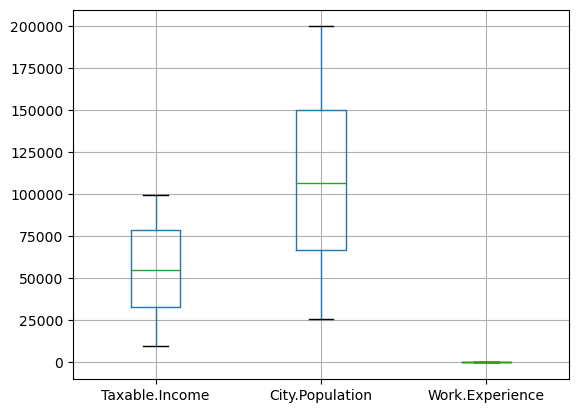

In [6]:
# checking outliers in dataset
df.boxplot()

In [7]:
# Converting categorical variable into dummy/indicator variables.

df = pd.get_dummies(df, columns = ['Undergrad','Marital.Status','Urban'])

In [8]:
df.corr()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
Taxable.Income,1.000000,-0.064387,-0.001818,0.049232,-0.049232,0.062099,-0.100611,0.037910,-0.070628,0.070628
City.Population,-0.064387,1.000000,0.013135,-0.079579,0.079579,0.004925,-0.007035,0.002087,0.040098,-0.040098
Work.Experience,-0.001818,0.013135,1.000000,0.005362,-0.005362,-0.014833,0.033347,-0.018123,0.094559,-0.094559
Undergrad_NO,0.049232,-0.079579,0.005362,1.000000,-1.000000,0.045101,-0.015120,-0.028883,-0.000267,0.000267
Undergrad_YES,-0.049232,0.079579,-0.005362,-1.000000,1.000000,-0.045101,0.015120,0.028883,0.000267,-0.000267
Marital.Status_Divorced,0.062099,0.004925,-0.014833,0.045101,-0.045101,1.000000,-0.468757,-0.510435,0.065518,-0.065518
Marital.Status_Married,-0.100611,-0.007035,0.033347,-0.015120,0.015120,-0.468757,1.000000,-0.520317,-0.016771,0.016771
Marital.Status_Single,0.037910,0.002087,-0.018123,-0.028883,0.028883,-0.510435,-0.520317,1.000000,-0.047014,0.047014
Urban_NO,-0.070628,0.040098,0.094559,-0.000267,0.000267,0.065518,-0.016771,-0.047014,1.000000,-1.000000
Urban_YES,0.070628,-0.040098,-0.094559,0.000267,-0.000267,-0.065518,0.016771,0.047014,-1.000000,1.000000


<AxesSubplot:>

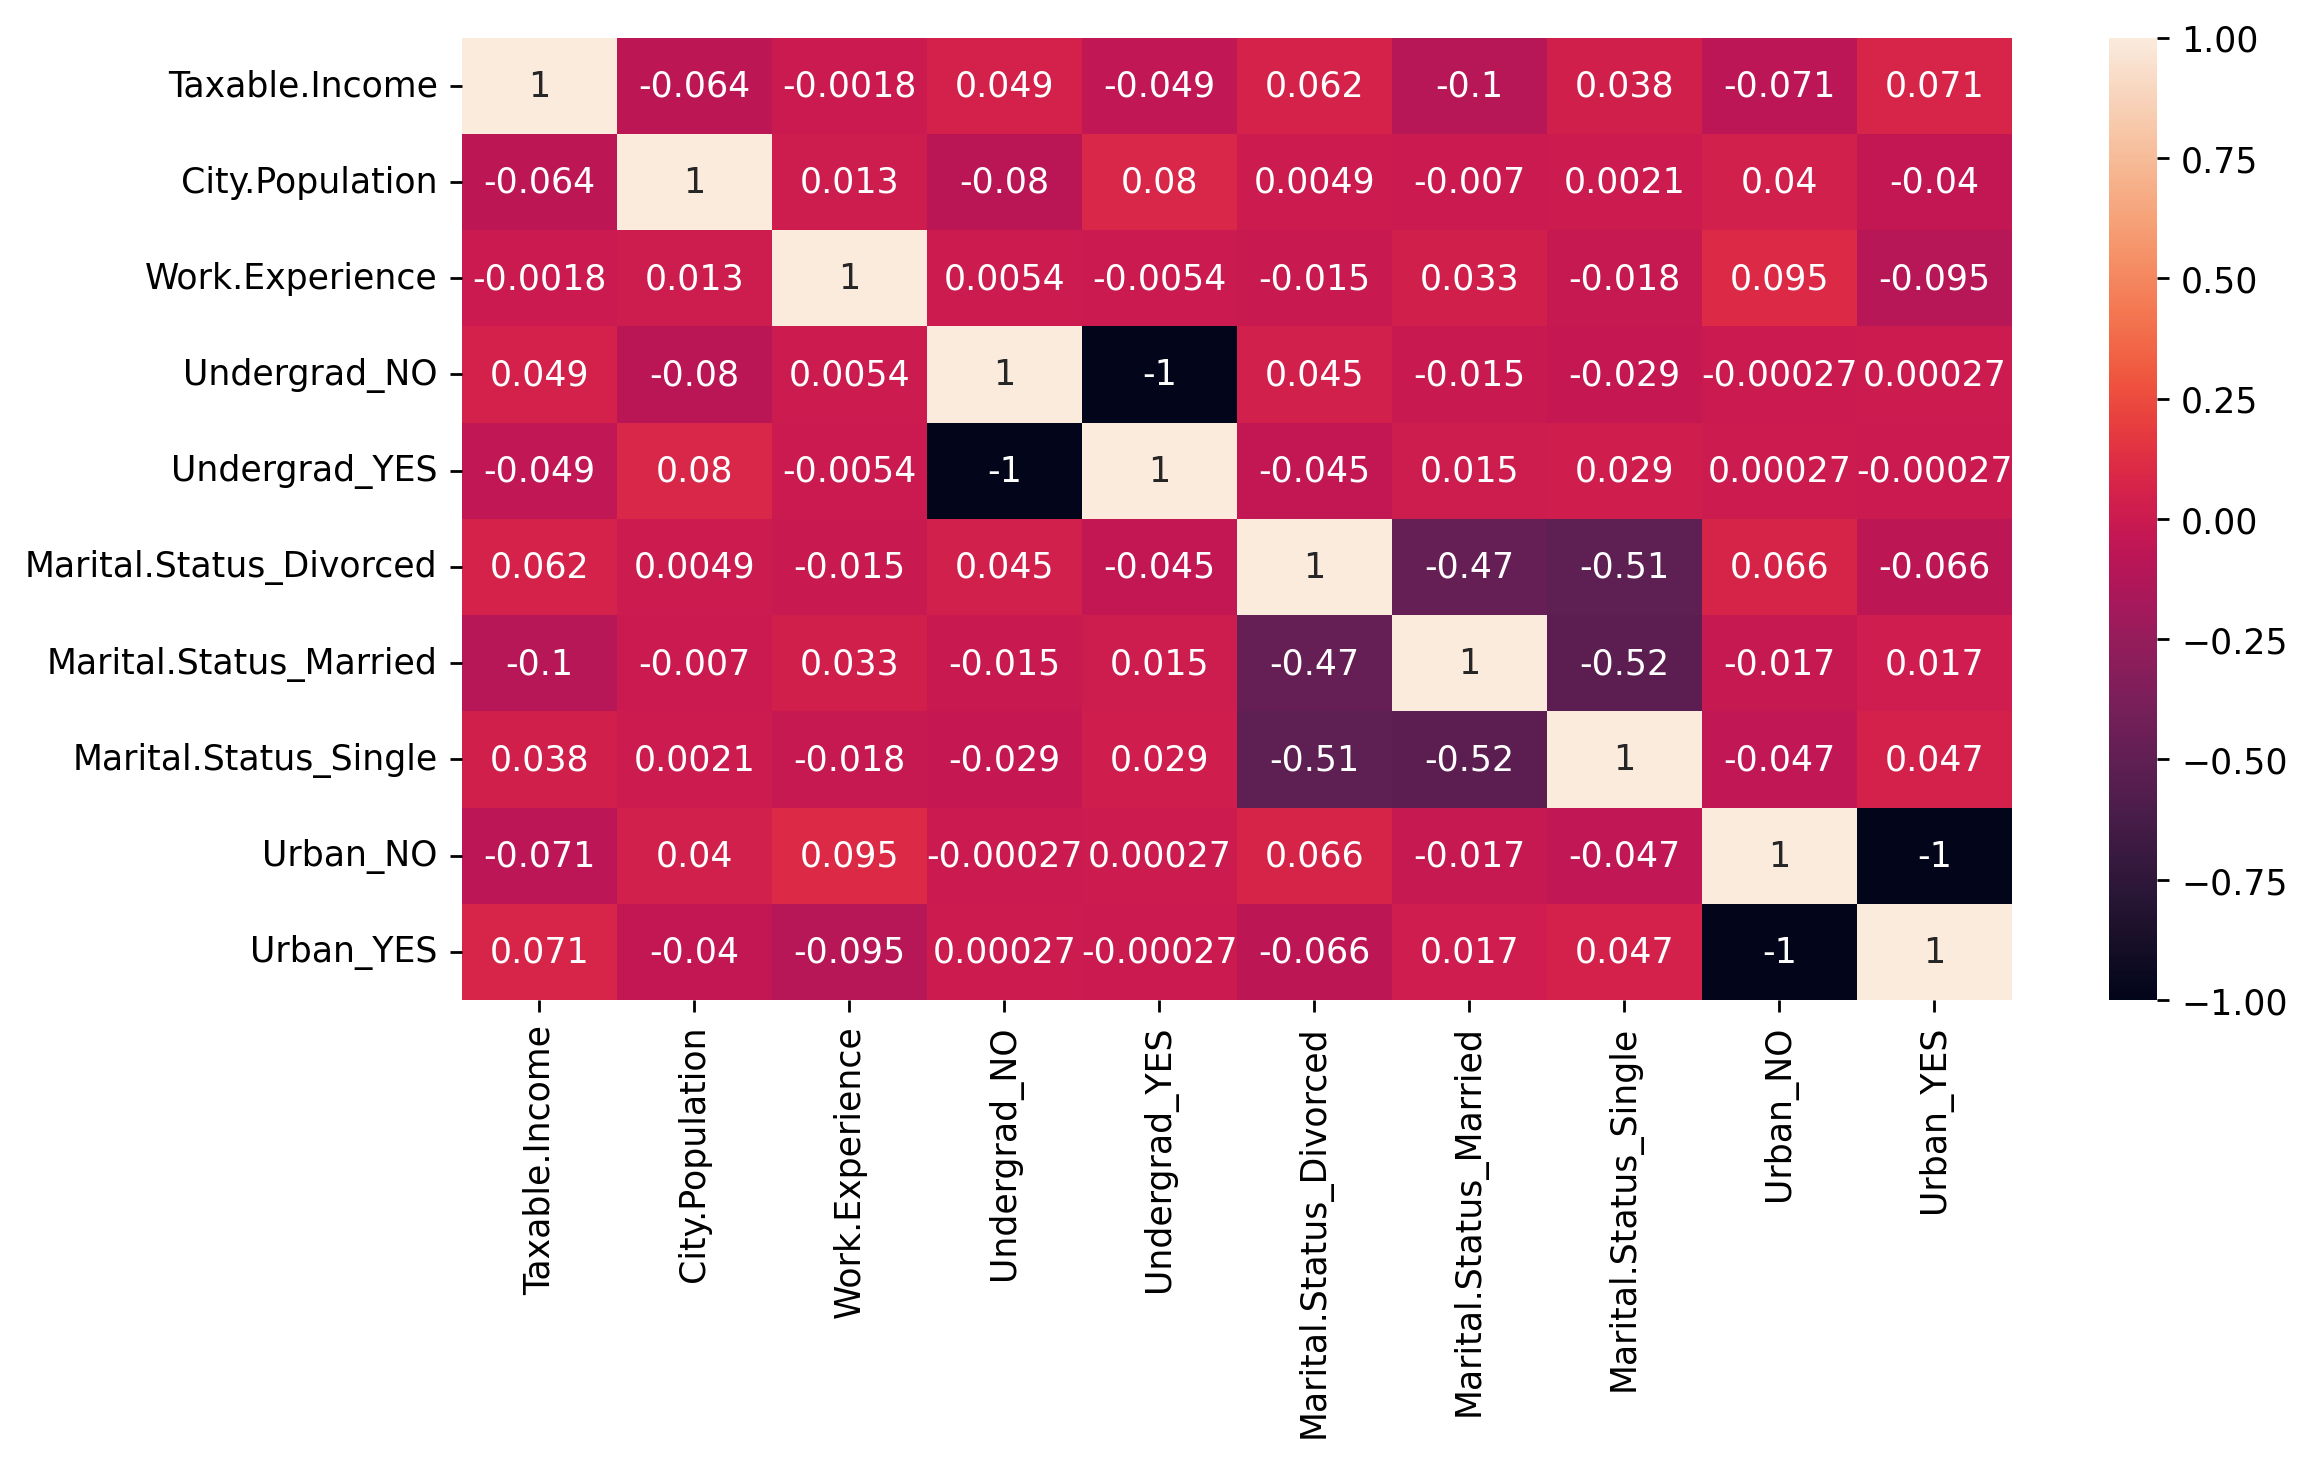

In [9]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250
sns.heatmap(df.corr(),annot=True)

## **Decision Tree**
 **Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"**


In [10]:
df['Taxable.Income']=pd.cut(df['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

list(df.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [11]:
x = df.iloc[:,1:10] #Independent variable
y = df.iloc[:,0] #Dependent variable

In [12]:
# Splitting data into train & test sets

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [13]:
ytrain.value_counts()

good     379
risky    101
Name: Taxable.Income, dtype: int64

***Model Building***

In [14]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

# Prediction for xtest
ypred = dt.predict(xtest)
ypred

array(['good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'risky',
       'good', 'risky', 'risky', 'good', 'risky', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good',
       'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'good',
       'good', 'risky', 'good', 'good', 'risky', 'good', 'risky', 'risky',
       'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good',
       'good', 'risky', 'risky', 'good', 'good', 'good', 'good', 'good',
       'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'risky', 'good', 'good', 'risky', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky',
       'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'good',
       'good', 'risky', 'risky', 'good', 'risky', 'risky', 'good',
       'risky', 'good', 'good', 'good', 'good', 'good', 'r

In [15]:
confusion_matrix(ytest,ypred)

array([[73, 24],
       [18,  5]], dtype=int64)

In [16]:
print(classification_report(ytest,ypred))
print("Train Score :",dt.score(xtrain,ytrain))
print("Test Score :",dt.score(xtest,ytest))

              precision    recall  f1-score   support

        good       0.80      0.75      0.78        97
       risky       0.17      0.22      0.19        23

    accuracy                           0.65       120
   macro avg       0.49      0.48      0.48       120
weighted avg       0.68      0.65      0.66       120

Train Score : 1.0
Test Score : 0.65


**Hyperparameter Tunning :**

In [17]:
params = {
    'criterion' : ["gini", "entropy"],
    'splitter' : ['best','random'],
    'max_depth' : [2,3,4,5,6,7,8,9]
}

In [18]:
# search over specified parameter values for an estimator.

grid = GridSearchCV(DecisionTreeClassifier(),param_grid=params)

In [19]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']})

In [20]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 2, 'splitter': 'random'}

In [21]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=2,splitter='random')
dt.fit(xtrain,ytrain)

# Prediction for xtest
ypred = dt.predict(xtest)

In [22]:
print(classification_report(ytest,ypred))
print("Train Score :",dt.score(xtrain,ytrain))
print("Test Score :",dt.score(xtest,ytest))

              precision    recall  f1-score   support

        good       0.81      1.00      0.89        97
       risky       0.00      0.00      0.00        23

    accuracy                           0.81       120
   macro avg       0.40      0.50      0.45       120
weighted avg       0.65      0.81      0.72       120

Train Score : 0.7895833333333333
Test Score : 0.8083333333333333


In [23]:
# Creating datframe for actual & predicted values

df_t = pd.DataFrame({'Actual':ytest, 'Predicted':ypred})
df_t

,Actual,Predicted
446,risky,good
404,good,good
509,risky,good
455,good,good
201,good,good
...,...,...
5,good,good
224,good,good
159,good,good
38,risky,good


In [24]:
cols = list(df.columns)

predictors = cols[1:10] #Independent
target = cols[0] #Dependent

In [25]:
dot_data = StringIO()

# Export a decision tree in DOT format
export_graphviz(dt, out_file = dot_data ,filled = True,rounded =True,
                feature_names = predictors,class_names = target, impurity = False)

In [26]:
# Load graph as defined by data in DOT format
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('fraud_full.png')

True

**Conclusion :**

The accuracy of the Training set is 100% we test the accurancy on the test data which is 65%

In the confusion matrix of Test data 82 instances are presdected correctly and 38 instances are not

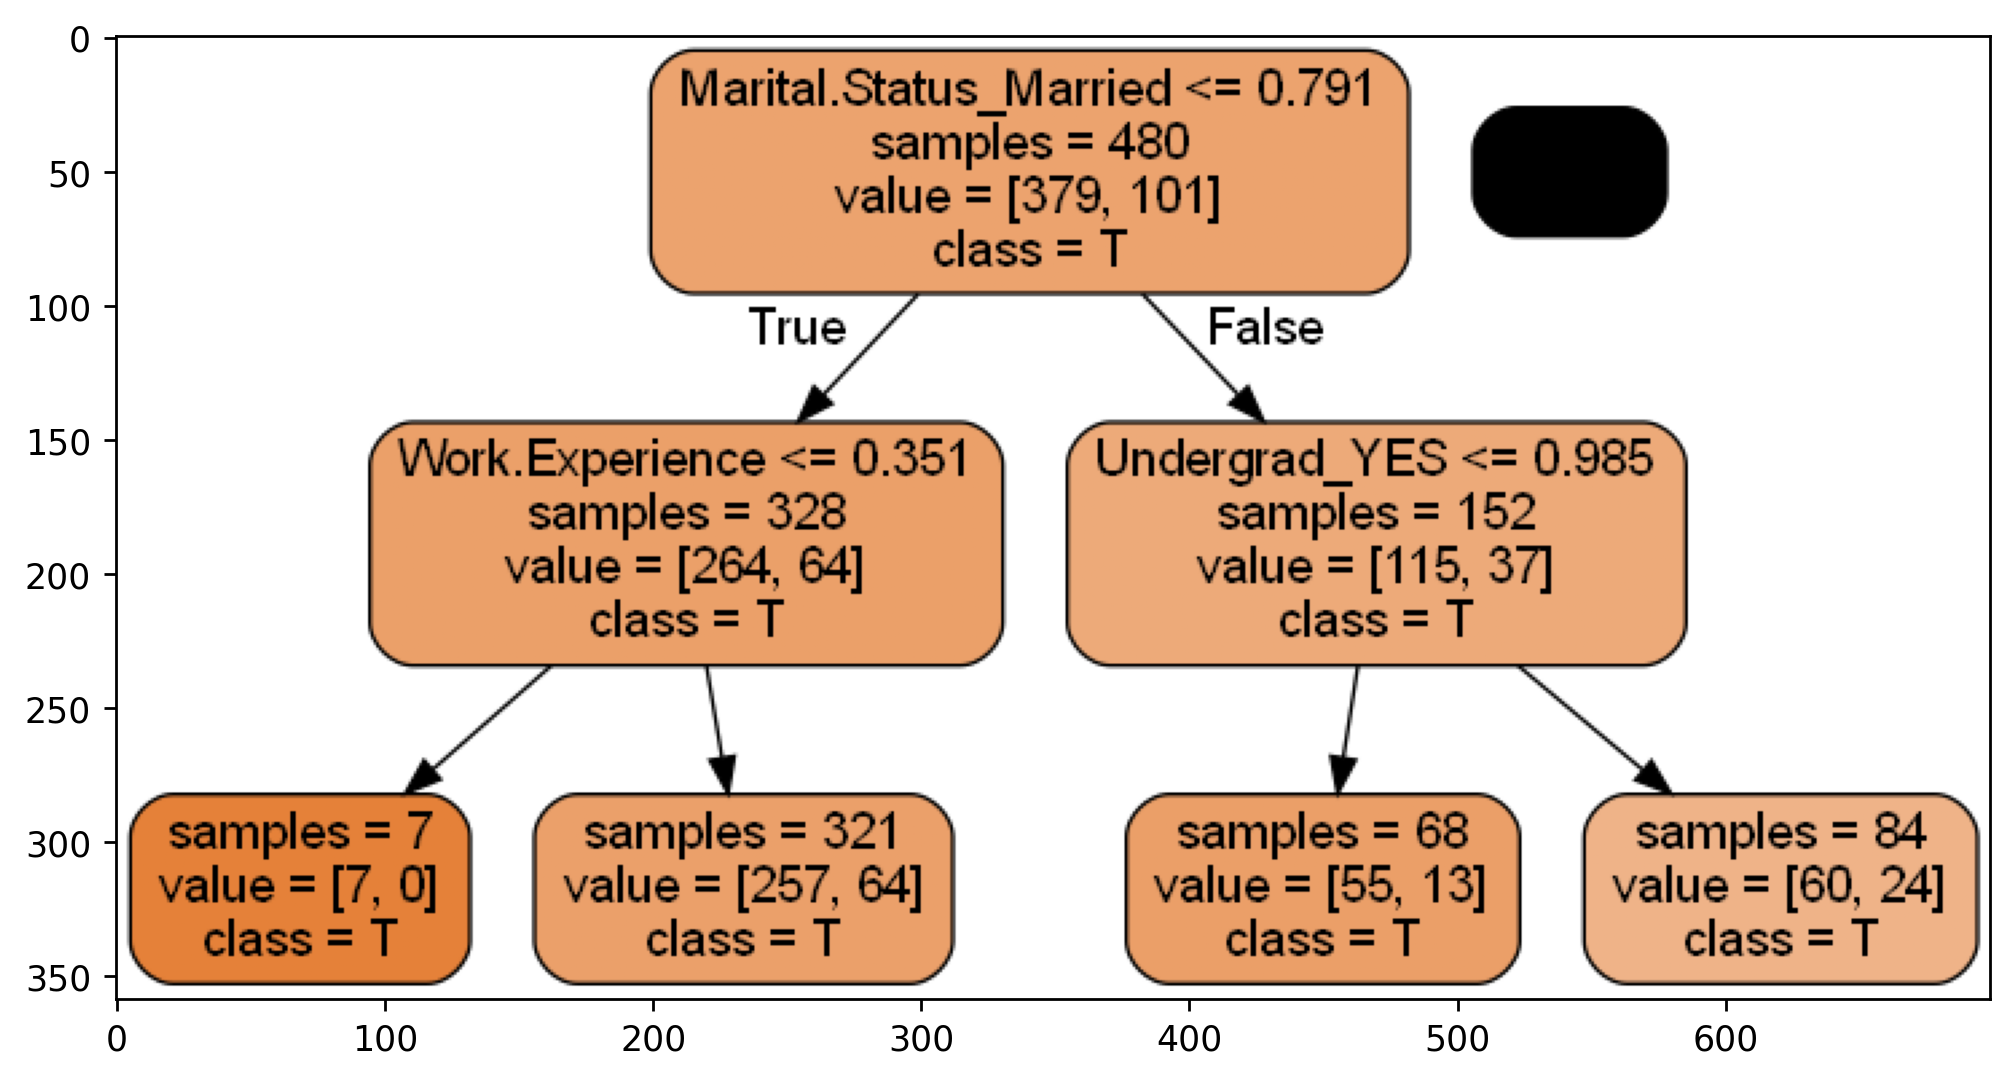

In [27]:
# Reading an image from a file into an array.
img = mpimg.imread('fraud_full.png') 

# Display data as an image
plt.imshow(img)

In [28]:
dt.feature_importances_

array([0.       , 0.320196 , 0.       , 0.3949049, 0.       , 0.2848991,
       0.       , 0.       , 0.       ])

In [29]:
feature_importance = pd.DataFrame({'feature': list(xtrain.columns),
                   'importance': dt.feature_importances_}).\
                    sort_values('importance', ascending = False)
feature_importance

,feature,importance
3,Undergrad_YES,0.394905
1,Work.Experience,0.320196
5,Marital.Status_Married,0.284899
0,City.Population,0.000000
2,Undergrad_NO,0.000000
4,Marital.Status_Divorced,0.000000
6,Marital.Status_Single,0.000000
7,Urban_NO,0.000000
8,Urban_YES,0.000000
